# Project 6 (part a):

## The Game of Life
The Game of Life is a cellular automaton devised by the British mathematician John Horton Conway in 1970.<img align="right" src="Grid.png" HEIGHT="400" WIDTH="266"> 

The "game" is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves.

The universe of the Game of Life is an infinite two-dimensional array of square cells, each of which is in one of two possible states:

- alive: cell has value = 1
- dead: cell has value = 0

Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. See Figure 1.

## Rules of the game:

At each step in time (also called "tick"), the following transitions occur to all cells simultaneously:

1. Any live cell with fewer than two live neighbours dies, as if caused by underpopulation.

2. Any live cell with two or three live neighbours lives on to the next generation.

3. Any live cell with more than three live neighbours dies, as if by overpopulation.

4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [1]:
# Weekly functions (until I build a module to import) & imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams["animation.html"] = "html5"

def GeneralListPlot(XList, YList, xlabel='X', ylabel='Y'):
    """A general function to plot 2 lists of floats, and label their axes"""
    plt.plot(XList, YList)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return()

In [2]:
class Game:
    
    def __init__ (self, file, S = [2,3], B = [3]): # Where S & B are survival and birth criteria
        self.B = B
        self.S = S
        self.world = np.loadtxt(file, dtype=np.int8)
        self.frame = 0 #Frame number/number of frames since start
        #Save the initial world, helps find the period
        self.initworld = self.world.copy()
        
    def __next__(self):
        """Generates the next frame of the game"""
        x_dim, y_dim = self.world.shape
        arr_next = np.zeros([x_dim, y_dim], dtype=np.int8)
        for i in range (x_dim):
            for j in range (y_dim):
                SurrCh = self.surrounds(i,j)
                if SurrCh in self.S and self.world[i,j] == 1:
                    arr_next[i,j] = self.world[i,j]
                elif SurrCh in self.B and self.world[i,j] == 0:
                    arr_next[i,j] = 1
                else:
                    arr_next[i,j] = 0 # <= to_unsigned(0,0);
        self.world = arr_next.reshape((x_dim, y_dim))
        self.frame += 1
        
    def living(self):
        """Returns the number of currently living cells in the world"""
        N = sum(self.world.flatten())
        return(N)
    
    def surrounds(self, x, y):
        """Checks the surroundings of a cell and returns the number of lives cells around it"""
        arr = []
        for i in range (-1, 2):
            for j in range (-1, 2):
                try:
                    arr.append(self.world[x+i,y+j])
                except IndexError:
                    arr.append(0)
        sum_ = sum(arr) - self.world[x,y]
        return(sum_)
        
    def livlocs(self):
        """Returns the locations of all the living cells in the world"""
        x, y = np.where(self.world == 1)
        return(x, y)
    
    def BCentre(self, DEBUG = 0):
        """Finds the Barycentre of the living cells of the board"""
        x, y = self.livlocs()
        xcent = sum(x)/self.living()
        ycent = sum(y)/self.living()
        if DEBUG == 1:
            print(xcent, ycent)
        return(xcent, ycent)
    
    def r_max(self, DEBUG = 0):
        """Returns the r_max of the current world"""
        centi,centj = self.BCentre()
        xs, ys = self.livlocs()
        r_max_ = 0
        for i in range (len(xs)):
            r_ij = np.sqrt(((xs[i] - centi)**2) + ((ys[i] - centj)**2))
            if DEBUG == 1:
                print('r_ij: ',r_ij)
            if r_ij > r_max_:
                r_max_ = r_ij
        return(r_max_)
        
    def reset(self):
        """Resets the world to it's initial state"""
        self.world = self.initworld
        self.frame = 0




## 1: Study  of ``still`` ``lifes`` and ``oscillators``:  [3 marks]

For the following shapes from the data folder:
- Loaf ("data/Loaf.txt")
- Pulsar ("data/Pulsar.txt")
- Pentadecathlon ("data/Pentadecathlon.txt")

Find the number of live cells and the $r_{max}$  as a function of time (number of steps).<br>

Can you determine the period of the above 3 shapes from these plots?<br>
Hint: One of the shapes does not change at all, the other 2 return back to their original configuration after certain steps.

$r_{max}$ is defined as:<br>
- Given N live cells at positions  ($i$,$j$) 
- Calculate the population "barycenter" ($center_{i}$,$center_{j}$), where $center_{i} =\frac{\sum_{i}^{N} i }{N}$ and $center_{j} =\frac{\sum_{j}^{N} j }{N}$
- Define the distance : $r_{i,j}= \sqrt{(i-center_i)^2+(j-center_j)^2}$ 
- $r_{max}$ is the maximum of all the $r_{i,j}$ i.e the distance of the furthest cell from the "barycenter" of the population.

In [3]:
# Pulling all the data files at once
loaf = Game('data/Loaf.txt')
pulsar = Game('data/Pulsar.txt')
pentadeca = Game('data/Pentadecathlon.txt')
glider = Game('data/Glider.txt')
glider_gun = Game('data/GliderGun.txt')
blinker = Game('data/Blinker.txt')
repl = Game('data/Replicator.txt')
rpant = Game('data/R-Pantomino.txt')
pond = Game('data/Pond.txt')


Loaf: 


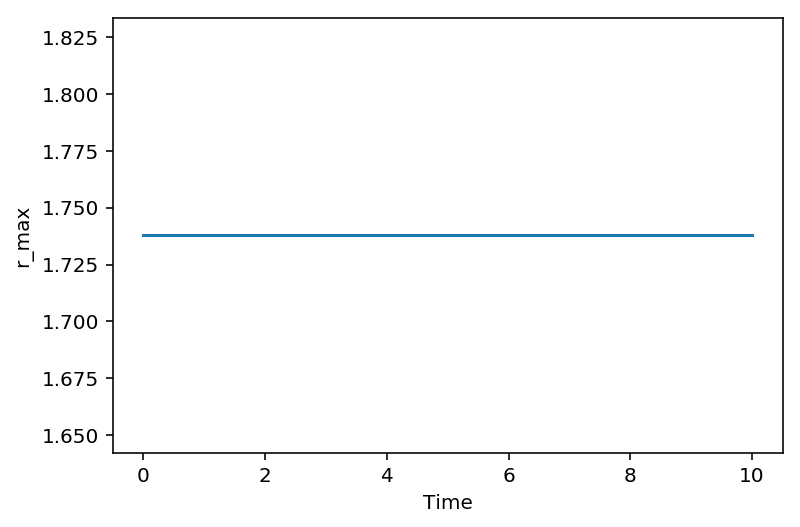

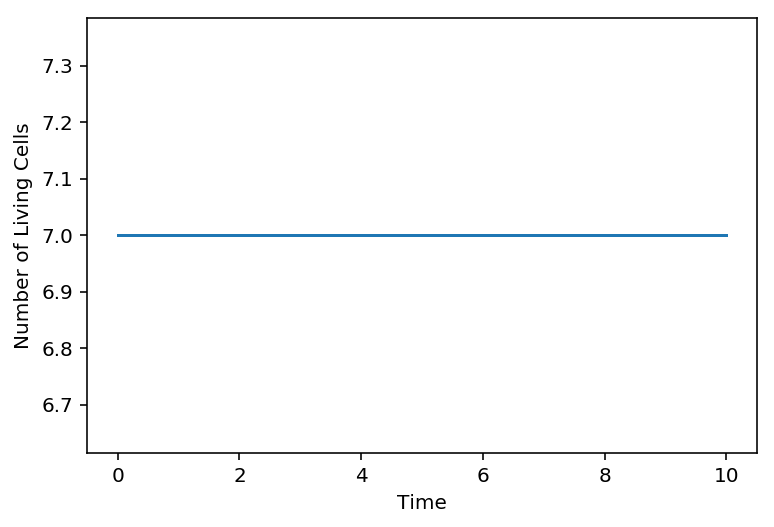

Pulsar: 


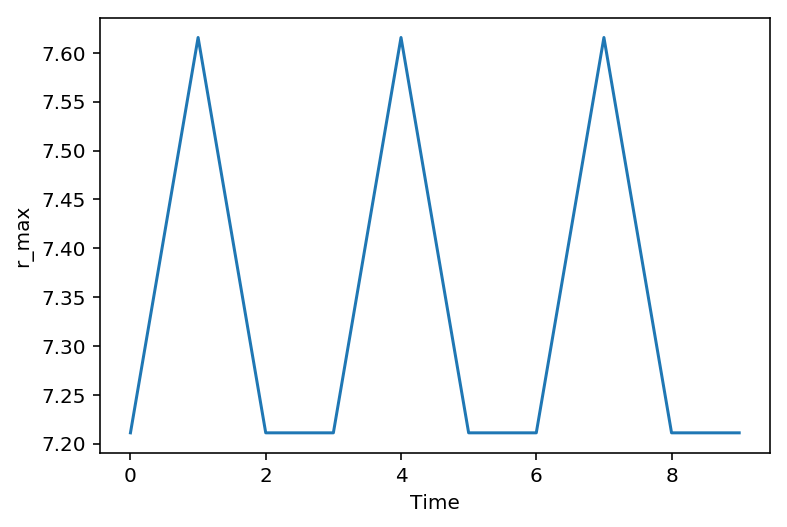

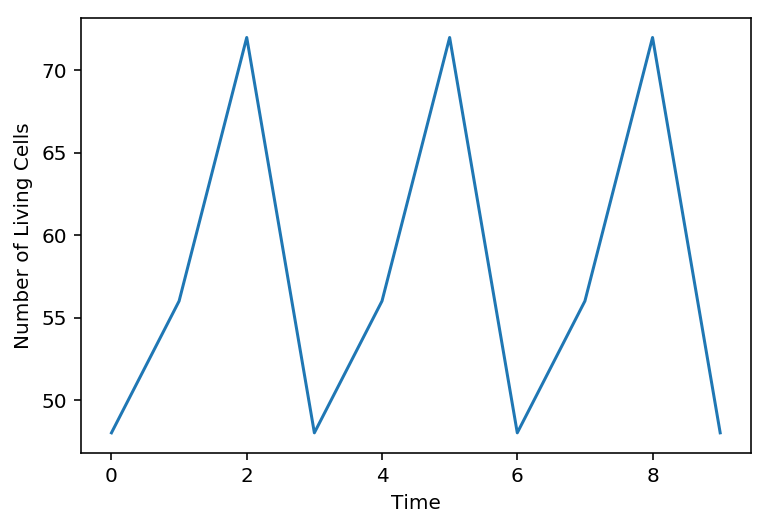

Pentadecathlon: 


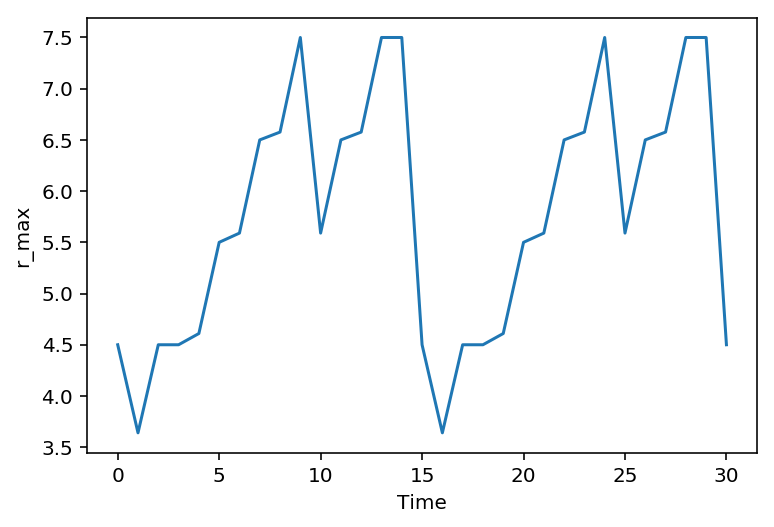

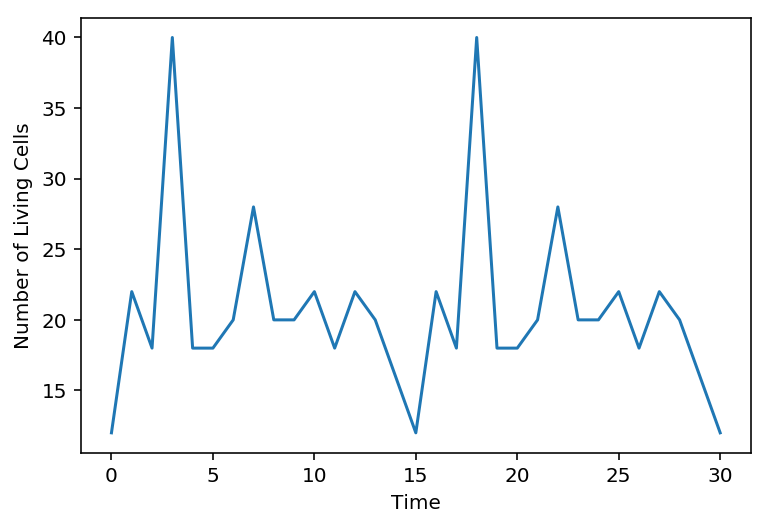

Loaf is unchanging/No period
Pulsar period = 3
Pentadecathlon period = 15


In [4]:
def part1run(world,nframes = 100):
    """Returns lists of r_max, number of living cells, and frame count of the world as the game progresses"""
    world.reset()
    rlist = []
    livlist = []
    framelist = []
    rlist.append(world.r_max())
    livlist.append(world.living())
    framelist.append(world.frame)
    for i in range(nframes):
        next(world)
        rlist.append(world.r_max())
        livlist.append(world.living())
        framelist.append(world.frame)
    return(rlist, livlist, framelist)
    
rlistLOAF, livlistLOAF, framelistLOAF = part1run(loaf, 10)
rlistPULS, livlistPULS, framelistPULS = part1run(pulsar, 9)
rlistPENTD, livlistPENTD, framelistPENTD = part1run(pentadeca, 30)

#Plotting the required graphs
print('Loaf: ')
GeneralListPlot(framelistLOAF, rlistLOAF, 'Time', 'r_max')
GeneralListPlot(framelistLOAF, livlistLOAF, 'Time', 'Number of Living Cells')
print('Pulsar: ')
GeneralListPlot(framelistPULS, rlistPULS, 'Time', 'r_max')
GeneralListPlot(framelistPULS, livlistPULS, 'Time', 'Number of Living Cells')
print('Pentadecathlon: ')
GeneralListPlot(framelistPENTD, rlistPENTD, 'Time', 'r_max')
GeneralListPlot(framelistPENTD, livlistPENTD, 'Time', 'Number of Living Cells')


print('Loaf is unchanging/No period')
print('Pulsar period = 3')
print('Pentadecathlon period = 15')

## 2: Simple animations :  [3 marks]

For the following shapes from the data folder:
- Blinker ("data/Blinker.txt")
- Pulsar ("data/Pulsar.txt")
- Pentadecathlon ("data/Pentadecathlon.txt")

Produce animations for each one. 

Hint : Use the results of the previous exercise in order to determine the minimum number of frames where applicable (typically you will not need more the 20 frames or so).

In [5]:
# Modified versions of the example code to produes an animation

def generate(game): # Using 'game' because world.world just looks wrong and could cause issues
    next(game)
    newworld = game.world
    return(newworld)

def animatefunction(world, inputframes = 100, inputinterval = 100):
    world.reset()
    fig = plt.figure()
    img = plt.imshow(generate(world), animated = True)
    
    def animate(frame):         # Why do we put this in here and not outside?
        img.set_data(generate(world))
        return (img,)
       
    plt.close()
    anim=animation.FuncAnimation(fig, func=animate, frames=inputframes, interval=inputinterval,blit=True)
    display(anim)
    pass

# Animations for the 3 asked for
animatefunction(blinker, inputframes = 2) # Number of frames just from observing the animation
animatefunction(pulsar, inputframes = 4) # Also from observing the animation
animatefunction(pentadeca, inputframes = 15) # From previous exercise

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAHlG1kYXQAAAKgBgX//5zcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9
MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2Nv
bXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9
MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50
PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhl
YWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02
OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAEP2WIhAA7//73Tr8Cm0WXagOS
Vwr2yqQmWblSawHypgAAAwAAEbBufJcNeavSJAAArb7P8jnPUcQAsgDXayoosczq2Gz7emnqPo+/
gAk8nfr7XmWEO3CLTd0Ghf+bfmBC4hnwxkaVfBfqEpYTaBgkLtD/7Pl1iEp29Y0aQaET0V8mz0fb
/HTk8afcf+lbVsv+7c8di74a5wl926cqFQZ3UOnigFEA1D2BO/N5rsXZQyPdRMdg7mQ79Gwzv4zg
DgjcSJzW1yRMg2rpdC+6wuCAJvq9XujFjwBLy00a6V9DQFrWGmtBRfWbWlhglkXiX9ZNSP3Hcz78
WF98twTOx5AfOVpKE13PRsQ5aN5NIBzs1cXp/0Bfr2ybacUBuiBvkV1VoxATxMi9KGzEX7zUJ3GJ
xj8No+uhiWRluDPDByIjTz/X5q8sfs8VYTwGbY3aNU4+jig/8BSGi6NhELQuk4ubu7l4QhoXyKrA
m3h9VldGNDW/4+gfZ6TMRszkJnmcrX6ae/gx+nPz7Z96EJSyDHgCZsxw3jnHJdINgRQoK+He8Atx
9/61nPgvhhN+vi429UTLVeN2fBRzCEbvkHPpE2DGw5WxuieXsy/YXpTne6rk9oLVzKWtjWvjvJ5T
Rler96Ozar8TBXlG3h8AfgVGNkFGo7FYbhXg9I5aRaYV12DH9kWk91DcunXNiXhyzj/laScix93w
1VHjuRqCgfEut9wROpPHxMfNyDM+rXPiK1YgzG6BJwAPu/+/+2rbBAWW44X2Cl+ANqmQt3Fy3Mxa
IAtd9Bes1CKJTsIKLTNyQ0BY/kv0z8uPcWykX+GSsANibf0KRnilJ0dQzZlFCf9my8qVIYqpeQI6
8a3oiNcHDiCvJsRtrpxKSXuN/YJUmNyNL/SqOL+N5AXGmeOoMy3T7hlGGDI0bk2/8yJiSTnuKA1X
h3Dt/x9kzh1zcWLuDF//eGAku6kTTjIPUfmNoFxB+2rWeb8QFSvhjyYsh8WfkFWsI3kz9ZOotC48
nLxLwaDqXF+CyCZZP90Wegzj9zKOagDlTegF45cIbvdpRzl/rO/PaA0leO++/L3Yb90YTxst+x/E
GtUjBioFDFGtd84IPcax6mLNhZ/Bv5LMg//fGbYc9GvGGmyqoAUdAzfB7OpY5EEbh1J8PvmzK8ep
5+zfseQXU4pDoMyGmJ24nXBTuMxSLRwp7UGM4FjiW7CS1JiCNW+iRnejYJ9qVJ7HE2egJLWLi2bw
X/592WTAr/ThoRrR4gKwvI4ZXbUgAdmY5n23dAARUQgqSpo++tYzcW78WWtraTxLCsmZVx7JeLdR
2NGap8UVoUWK2ngxlTooNGGSBFWEAUCcPDit0Tjpw76H7sWmxE2PYKINV1bprtDrf2tegwgkqQC2
Y4BDIacxly9vl6uEtZ2HW8J83zWohAjxkElqQxMrsxgM8u/yQABtCKIAroEAAAChQZohbEN//qeE
Ei0ovtv7d8sBPQPdYVhP5wgjhAC6T6MwYV8EdOtHWeQ5pognsC4XcBSD5SJG2QST6Y64wUy8qBm1
vnaao11SwPLm9rZpznF5pbFDWMrQfXvRU3PMyq6q99Q2bYSCjDbjRW4jadTWPK74ijDyw8w0t281
lw8uXD768OXofUZWNtY63d6qB9MWWEemNmeAT22+gU9ycYIHTpgAAAMmbW9vdgAAAGxtdmhkAAAA
AAAAAAAAAAAAAAAD6AAAAMgAAQAAAQAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAABAAAAAAAA
AAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAlB0cmFrAAAAXHRraGQA
AAADAAAAAAAAAAAAAAABAAAAAAAAAMgAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAB
AAAAAAAAAAAAAAAAAABAAAAAAbAAAAEgAAAAAAAkZWR0cwAAABxlbHN0AAAAAAAAAAEAAADIAAAA
AAABAAAAAAHIbWRpYQAAACBtZGhkAAAAAAAAAAAAAAAAAAAoAAAACABVxAAAAAAALWhkbHIAAAAA
AAAAAHZpZGUAAAAAAAAAAAAAAABWaWRlb0hhbmRsZXIAAAABc21pbmYAAAAUdm1oZAAAAAEAAAAA
AAAAAAAAACRkaW5mAAAAHGRyZWYAAAAAAAAAAQAAAAx1cmwgAAAAAQAAATNzdGJsAAAAs3N0c2QA
AAAAAAAAAQAAAKNhdmMxAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAbABIABIAAAASAAAAAAAAAAB
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGP//AAAAMWF2Y0MBZAAV/+EAGGdkABWs
2UGwloQAAAMABAAAAwBQPFi2WAEABmjr48siwAAAABx1dWlka2hA8l8kT8W6OaUbzwMj8wAAAAAA
AAAYc3R0cwAAAAAAAAABAAAAAgAABAAAAAAUc3RzcwAAAAAAAAABAAAAAQAAABxzdHNjAAAAAAAA
AAEAAAABAAAAAgAAAAEAAAAcc3RzegAAAAAAAAAAAAAAAgAABucAAAClAAAAFHN0Y28AAAAAAAAA
AQAAACwAAABidWR0YQAAAFptZXRhAAAAAAAAACFoZGxyAAAAAAAAAABtZGlyYXBwbAAAAAAAAAAA
AAAAAC1pbHN0AAAAJal0b28AAAAdZGF0YQAAAAEAAAAATGF2ZjU3LjgzLjEwMA==
">
 Your browser does not support the video tag.

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAZvG1kYXQAAAKgBgX//5zcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9
MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2Nv
bXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9
MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50
PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhl
YWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02
OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAPgWWIhAA///73aJ8Cm1pDeoDk
lcUl20+B/6tncHyP6QMAAAMAAK6sc+imSBhd68YAAm7AJxNwJ1/4gBuPZpp8N7bN3IpgbPpXwZ/q
Lr5N1+z+LvNm7cKIiBn/1p+dK/pLyrZ/popCuJDe9GFLUwVeGJpIlwYGEVyoTzv8PGSCFLmL3OPN
oTb6+ez9vuSiDZgejj2MYA5AWBgZDpIkHv9OqCpkfu+Cr3qeu/An3ApbxPQK0aLsWh1wgwWqF6+4
i+EPXDBFYeEMjVka3x5LKzvhOWgvqdY31ctU84XNg7xQTlfiqU9s314V361rSfqiNx2MIZ7zR7Ek
feIOMBAlNKEHh35f5OA5qqPY4aLgM2I3hDGIwnm9T3PZFIobwW/ECkmDS5SLUMGHiqEQagic5a8N
6DvJIIWeh76bXfkyWAOjIyUlXPCqg/zh5MqG86ThGKZiD8BJmEpUff8HvobIDfdvPTtxIHpX5IWE
CKM0smCCDkuHLqPgNHJNrrVf10E2QsIzOwSnlAEfD2kj9ShQQfjCJC7w9UquP/yjg28t7KxE7zfh
4Wn0IVoiLq5aFM9Amf5j9Kk3bwh+OgX8ymCLGjhZsLzkWNdx2/hu8+QsYIQmLm70QFn4UUorlouK
+AuBXIjI4a4WqX72cyPrlseF4x7/hQ1Eska8v1JlYhcBnQz15DX/8fLyWKcn9D2BEa86UpD93xOW
aPjc1/79mwC9ZAg9DjwuEqjmaV/MtAHk+G0bcMu0+Bvswyv1QZWxgjRGvKTy78HtfLvtBWpLOpas
qHaUFfwbBqzsuRmqCMeyKIrs95bbqv8o5hB6e52iXGZ5HfpPNsaAnClRJ31v76Ill2U6s/yc1oMQ
ksODHzstMtFMoqRrwAIAf4BNNxC07nvoCnbIAwfnyjtnxsJlIb84JFJuAjQzKEZfSjdNe9dDOBrU
p3DFvtjrkCmlmCTqQyjSQFy9k5GqJ3PXTkxqeqtMYh4p55mNTHnb9K/1qwJJP/PFk2f36M8dP389
Z2ZkRKnfFvct18hhPDC5NVDMg9PS+GW5tS00hRrrdKGgTIrc6oqUS+haEjDZMuSkt72y7YcknC3O
K3GneX1zMrTYUHoRaWqRtnrQsZEQjpfYnjmXmQ7zkvmVWHY95GpWZ9IKgUtoR7IXP3pJQVjr+TFj
sYqPcoYJ3U+bGzQLp2HMz/WygbsUw99qv/8vyEBqfnDZLc/MNPsYROXt7i6gtnt/ZLI6qGFMBAAd
Y/4lm7WTdU2O9heEmarKpzRw2Q13oz89Tn70n44Ya02aoMBJVamlCElZQzdp5dF+xzti30ILwMjX
weGxtOLH8ydwcNm2l5/5fda7XHtpoJ77iRcRBtG7iJEhQgS7OVtY0+UfByIQGxUBun84qp6GP2RW
KC2Z5/zzVOA6aLNW199g9ecv3u9liIoz3BJu9m4ewRQeA54/VsXG16M7X/hmJ+vyDFzNXO3icp63
/0oMHo8NjXNvdLrS0D5oox06r2XZv7XvzXeuQguPZ4tjdlxwAwdUnIFlOkcGO+NnCLRVMBZBeYZw
zMBB7aDmKTrXJEgUfbz15T4ZPM//fFp66aFz7H5r6xggZMTghy9JBT6nkJAduRAdGOJVmfNrUdLJ
235k4qASsNGZkr1lneoZzAwLiQA+vPQB85P8jhPj25UD5CP037JRCcaulqKWqLKbeP6oaUyBTZFa
gF93NUqHRllSEwBjSA0VLAyfetHJRSu+W+tFcqSyF0v8O1xqURTe9I5Lm1SyhTKrPzoQ1rK0aNQN
okmzOM1jXM+81NL1TIxASydlmemF/6BmvLLiDTDpTCQGmPXrjZ0f99W1wrBTnbEUoAQdaQUhpWpf
gukXj9OtghYIYAY7dWyQW9Y+v4Qcog9snoW1FfhDEqEnrNU6D9klfpcq8BkMp/Mj/dlWAJphhhP/
gqdOctR2UinV0g+HTn7RZ68RXmMcqdp6mxq+ZFIQ6F+yId0VOPHuRdY6tUgdmLsEqLT7gS6ANpOm
daQ9PlXgRCyzWVNm33tpmuC+isXG67p538OxxGD97zUwbPfffFdbjCFg3ecFJYv/rRr3dVjxCgAX
KGHbAW5wMul0wHA2WMsUd0qrau2Ikl+/daKb5PnPw5FCpDXdb1YaSBWOhkc5uSO7Z9zE/bfF9Hv6
W2W8DstU8UyvO00NWDN204B4mU7Lr1HBrej6Us9xMBNw0byXVI9Oh8rMkgDbUeSsY5DRzN0MeMhL
eJhFryG+GS+0jOxUfqQx4FIrYr7wH9jRXgY/U8tAM6Z+1JOdfqh7vp0wfkX2y1M5uV4tn9laTIkZ
LXai16j+qXUWO1EOYbUuvCMIylJWrYA4IYQQ7H4sdOo//wWeaz8KuwOpmp6I+CxgoUmnkeWqVyiv
Tlpj9x+1NfJQcA4sDziv5wg5ZbozL7D/7X6TiWoVx0oap/P0LiOis6xC4zWbnOCv0fE7/xtjSSf+
4vI4JKB8lghSbX1TDZ7b7sYBe2hFaoTUetAGB88uRETL5aniC+75krSwIHdUX8b2PPMI5ZCvuQUN
p3IvcFfXOIDijHq3iU7qtuw5F6kd6adPI2qeM6rdHx/ehvK8q57+cvkzxjTZ/EI4C6KObbu6MSyy
PVRxJ9I0gJSlEA6q5Ovwa/hj3yk+TP/3Oc40oiah1/lFjiCzRteA/BpP7Nft0gWJNqUF1zKV3Dpo
Mp0PH4/5BpLAceDZqpQBPg038DiZ0MGNltB7pplRyecY60L5qDBAnBQgkHX0t4j6CAzjLWGJzYBW
bH3fMyNYCrhiyV/BqG+NEgyh9cnN3kMzdL+noVRwNlH2f1pQpVHeY7QKbvEfVmx1KBxPvZvbZz/W
WmdCj0glMA7bw1Xo52UlorZPyDUC8HF+tlJVjsDkqE65CPeAKAEU/X510Ezqigy5MM64BS5BjcX1
Wt9FUDCldaGDlkRjm7GZx

## 3: Replicator :  [4 marks]

Conway's Life is classified as following the $\textbf{B}$3/$\textbf{S}$23 rule.

Specifically a cell:
- is $\textbf{B}$orn if it has exactly 3 neighbours
- $\textbf{S}$urvives if it has 2 or 3 living neighbours 
- it dies otherwise.

Another member in the family of "Life" cellular automata is ``HighLife`` that follow the $\textbf{B}$36/$\textbf{S}$23 rule.

A cell:
- is $\textbf{B}$orn if it has 3 or 6 neighbours
- $\textbf{S}$urvives if it has 2 or 3 living neighbours 
- it dies otherwise.


Following the HighLife rules and  employing the Replicator pattern present in the data folder ("data/Replicator.txt").

1. Evolve it for 36 generations.
2. Produce an animation of the above 36 frames showing the system evolution
3. Plot the Number of cells versus time
4. Plot the  $r_{max}$ as a function of time
5. Can you see why it is called a "Replicator"?

In [6]:
HighLifeRepl = Game('data/Replicator.txt', S = [2,3], B = [3,6]) # The magic of our class allows us to freely change the game rules

rlistHLR, livlistHLR, framelistHLR = part1run(HighLifeRepl, nframes = 36)

animatefunction(HighLifeRepl, inputframes = 36)

print('HighLife: ')
GeneralListPlot(framelistHLR, rlistHLR, 'Time', 'r_max')
GeneralListPlot(framelistHLR, livlistHLR, 'Time', 'Number of Living Cells')

# Duplicates (or replicates) the starting shape repeatedly over time
